<a href="https://colab.research.google.com/github/Reboot2004/CyberGuard-AI-Hackathon/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Load the training and test datasets
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


In [11]:
# Display shape and basic information about the datasets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Check for null values
print("Train Data Null Values:\n", train_data.isnull().sum())
print("Test Data Null Values:\n", test_data.isnull().sum())

# Check for unique categories and subcategories
print("Unique Categories:", train_data['category'].unique())
print("Unique Subcategories:", train_data['sub_category'].unique())

Train Data Shape: (93686, 3)
Test Data Shape: (31229, 3)
Train Data Null Values:
 category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64
Test Data Null Values:
 category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64
Unique Categories: ['Online and Social Media Related Crime' 'Online Financial Fraud'
 'Online Gambling  Betting' 'RapeGang Rape RGRSexually Abusive Content'
 'Any Other Cyber Crime' 'Cyber Attack/ Dependent Crimes'
 'Cryptocurrency Crime' 'Sexually Explicit Act'
 'Sexually Obscene material'
 'Hacking  Damage to computercomputer system etc' 'Cyber Terrorism'
 'Child Pornography CPChild Sexual Abuse Material CSAM'
 'Online Cyber Trafficking' 'Ransomware' 'Report Unlawful Content']
Unique Subcategories: ['Cyber Bullying  Stalking  Sexting' 'Fraud CallVishing'
 'Online Gambling  Betting' 'Online Job Fraud' 'UPI Related Frauds'
 'Internet Banking Related Fraud' nan 'Other'
 'Profile Hacking Identity Th

<ipython-input-12-585dc6098703>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='category', order=train_data['category'].value_counts().index, palette='viridis', ax=axes[0])
<ipython-input-12-585dc6098703>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-12-585dc6098703>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_data, x='category', order=test_data['category'].value_counts().index, palette='viridis', ax=axes[1])
<ipython-input-12-585dc6098703>:13: UserWarning: set_ticklabels() 

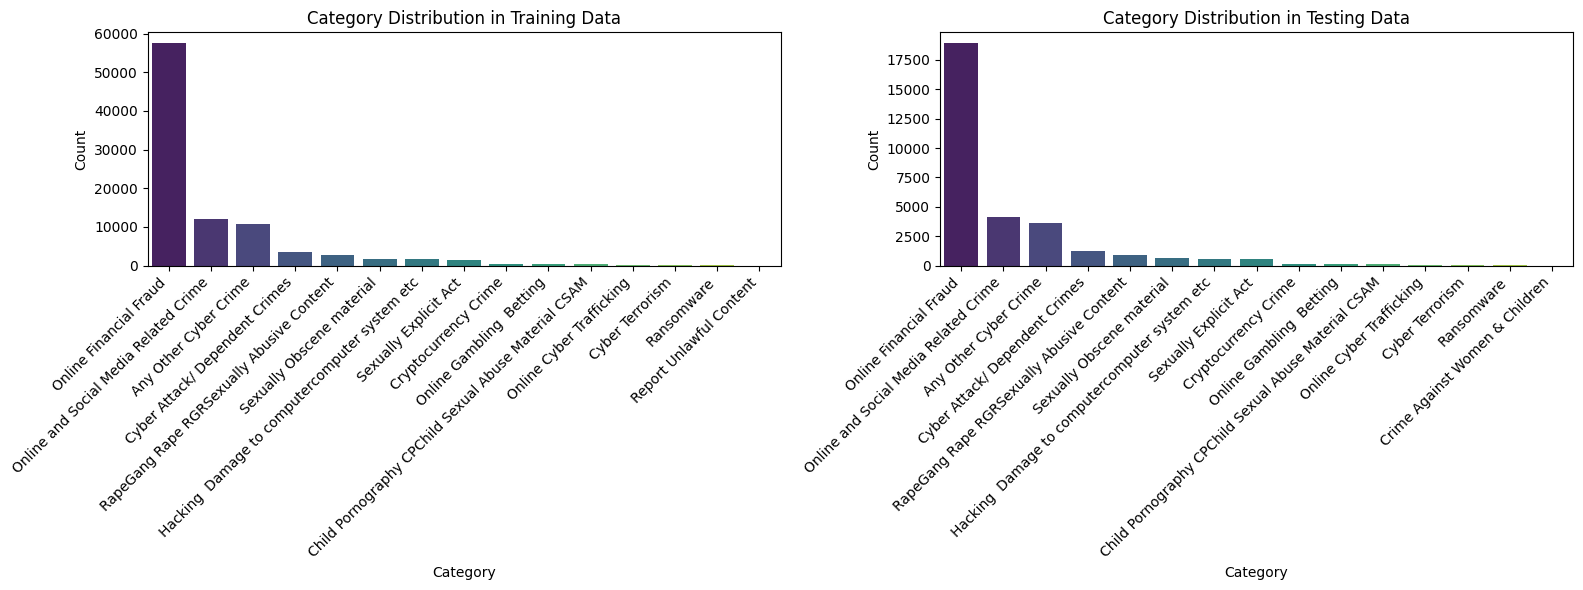

In [12]:
# Set up subplots for category distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Category Distribution in Training Data
sns.countplot(data=train_data, x='category', order=train_data['category'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Category Distribution in Training Data')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Category Distribution in Testing Data
sns.countplot(data=test_data, x='category', order=test_data['category'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Category Distribution in Testing Data')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<ipython-input-13-d14734b74885>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='sub_category', order=train_data['sub_category'].value_counts().index, palette='viridis', ax=axes[0])
<ipython-input-13-d14734b74885>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-13-d14734b74885>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_data, x='sub_category', order=test_data['sub_category'].value_counts().index, palette='viridis', ax=axes[1])
<ipython-input-13-d14734b74885>:13: UserWarning: s

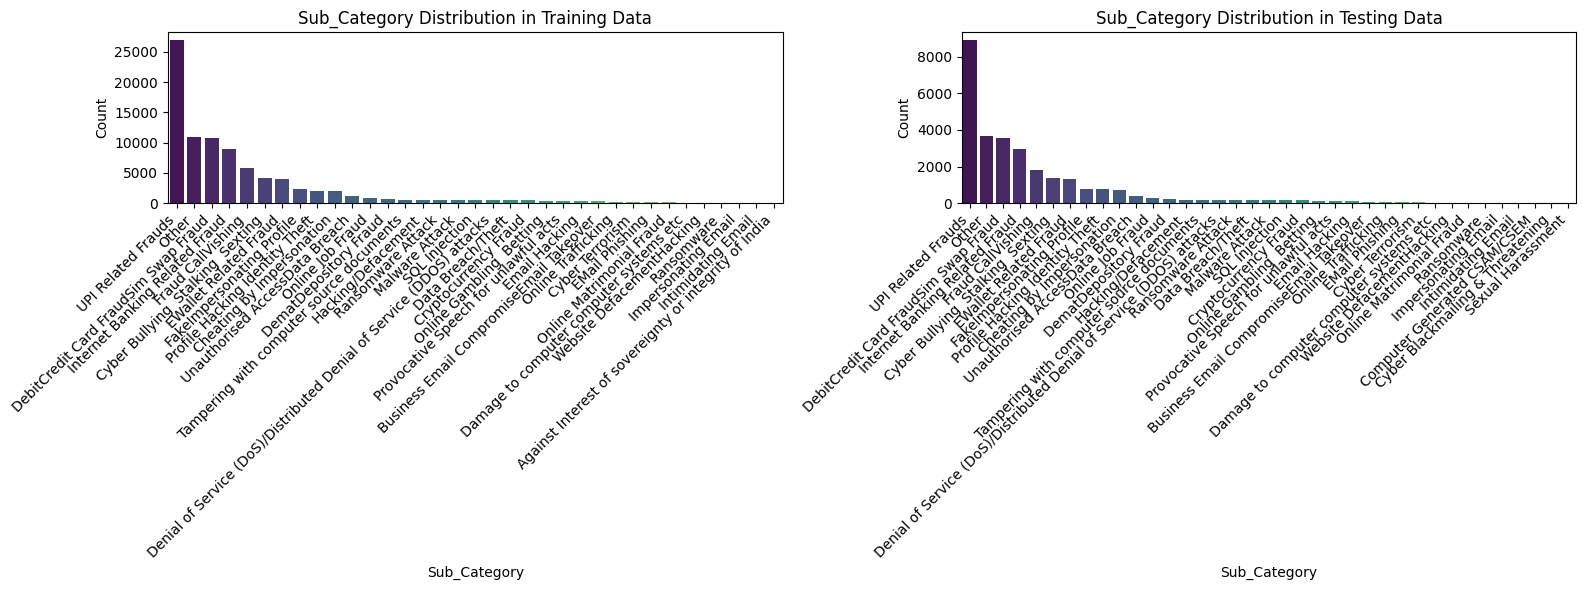

In [13]:
# Set up subplots for subcategory distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sub-category Distribution in Training Data
sns.countplot(data=train_data, x='sub_category', order=train_data['sub_category'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Sub_Category Distribution in Training Data')
axes[0].set_xlabel('Sub_Category')
axes[0].set_ylabel('Count')

# Sub-category Distribution in Testing Data
sns.countplot(data=test_data, x='sub_category', order=test_data['sub_category'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Sub_Category Distribution in Testing Data')
axes[1].set_xlabel('Sub_Category')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

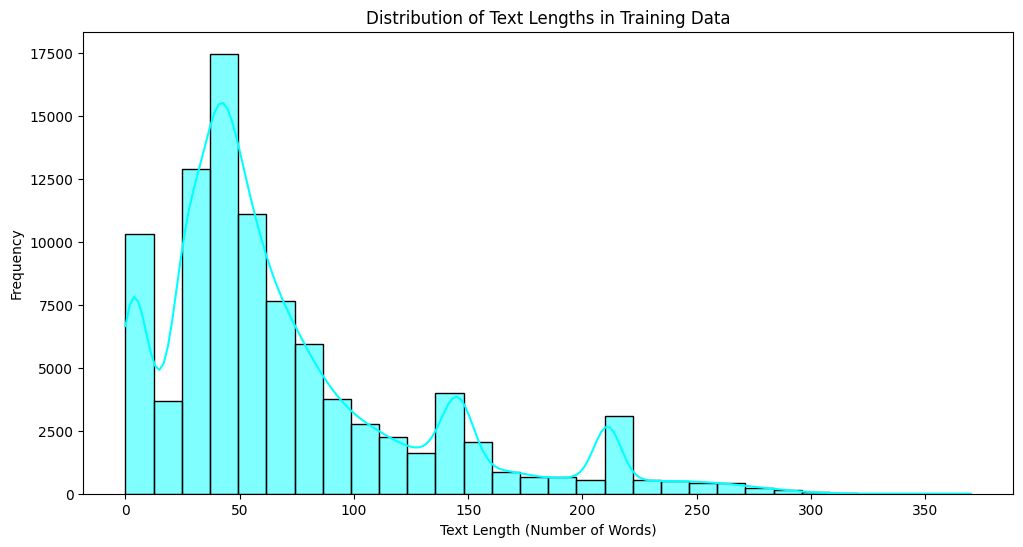

In [14]:
# Analyze text length
train_data['text_length'] = train_data['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
sns.histplot(train_data['text_length'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-c9da69c285b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='category', y='text_length', palette='Set2')


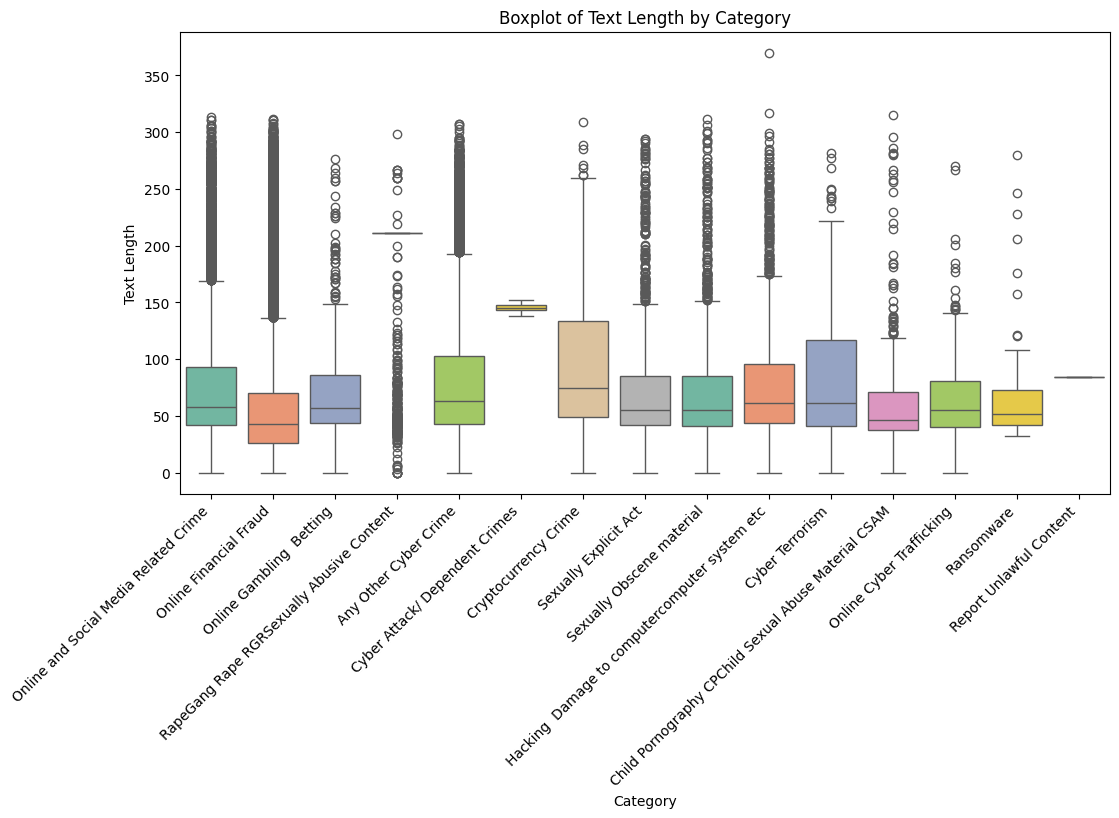

In [15]:
# Boxplot of text length by category with color map
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='category', y='text_length', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.show()

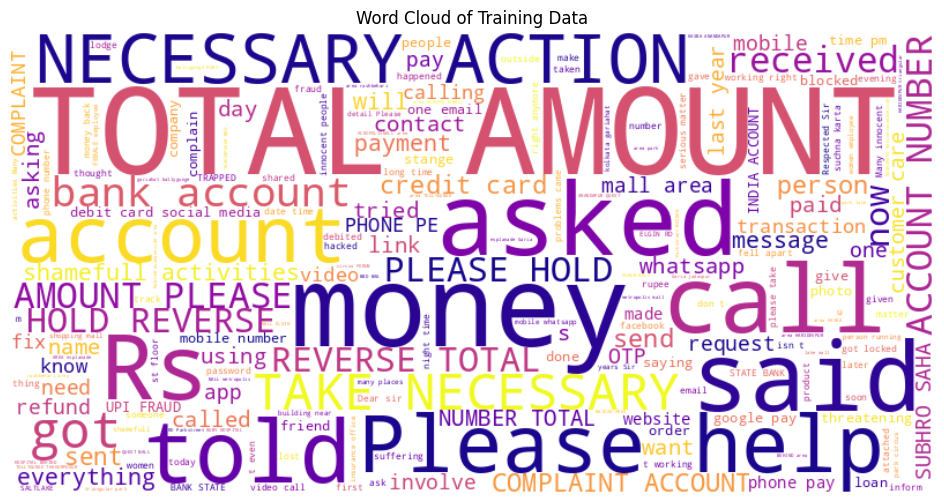

In [16]:
# Word Cloud for overall text, excluding stop words
stop_words = set(STOPWORDS)  # Default stop words from WordCloud
custom_stop_words = {'crime', 'information', 'provided'}  # Add more as needed
stop_words = stop_words.union(custom_stop_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma', stopwords=stop_words).generate(' '.join(train_data['crimeaditionalinfo'].fillna('')))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Training Data')
plt.show()

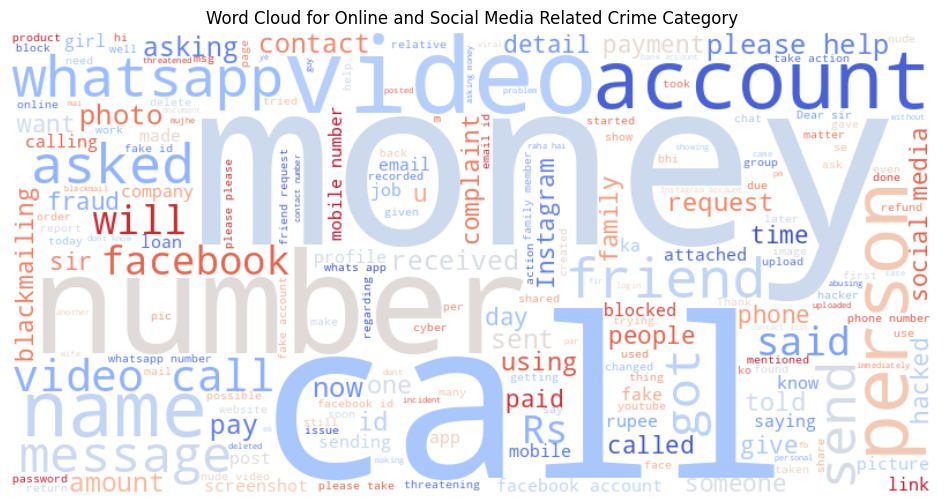

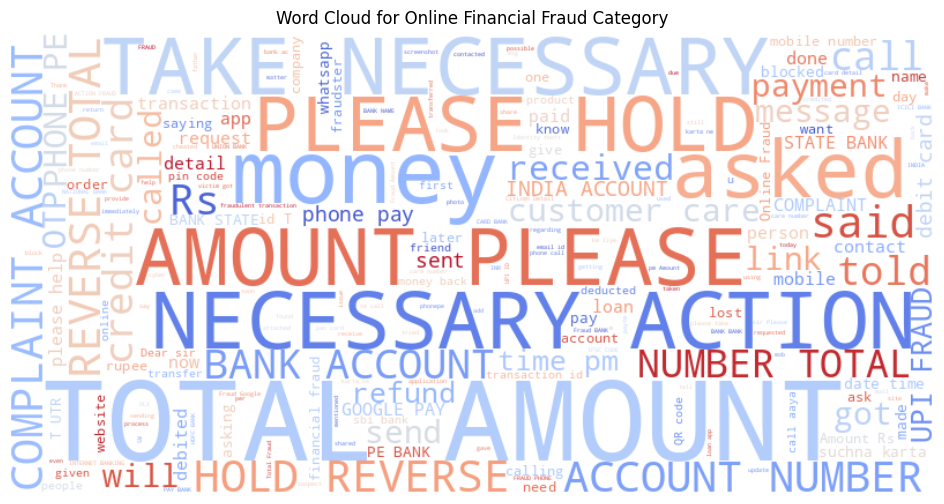

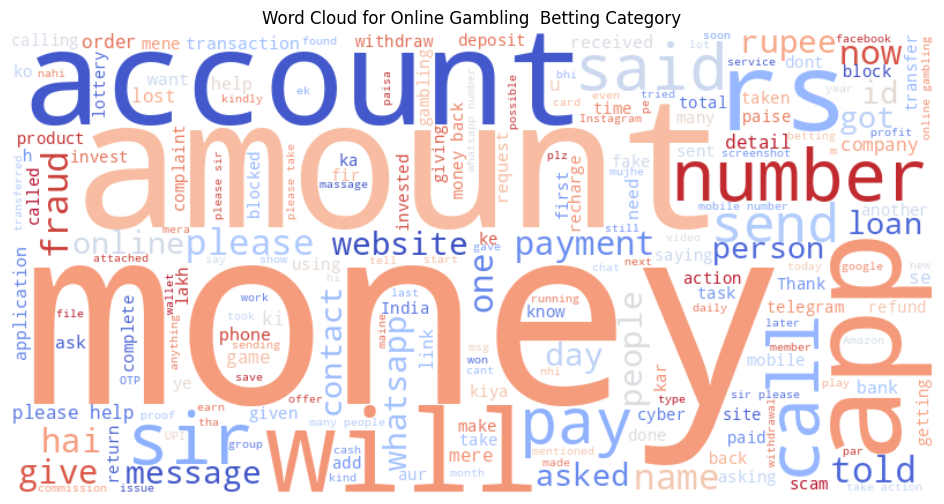

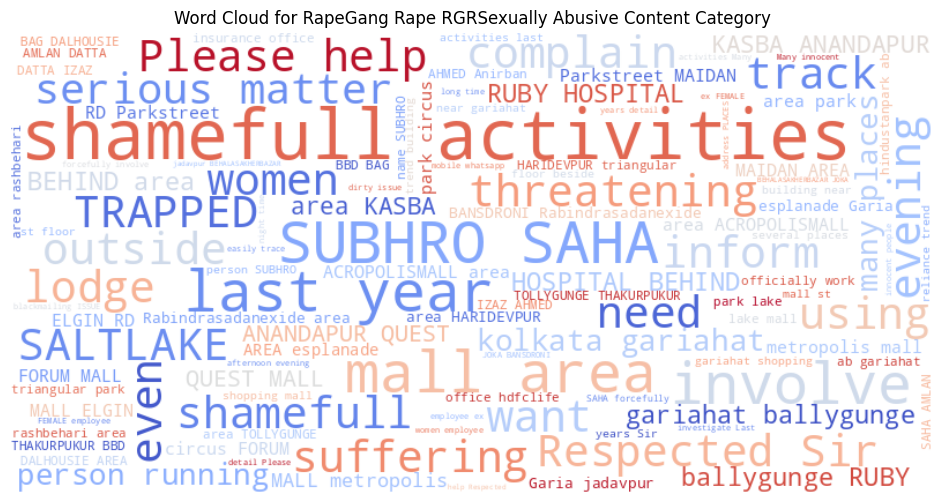

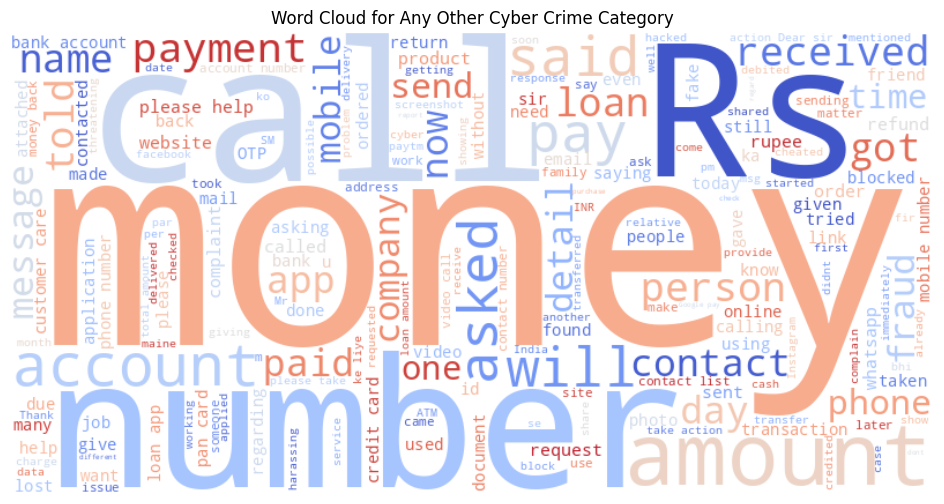

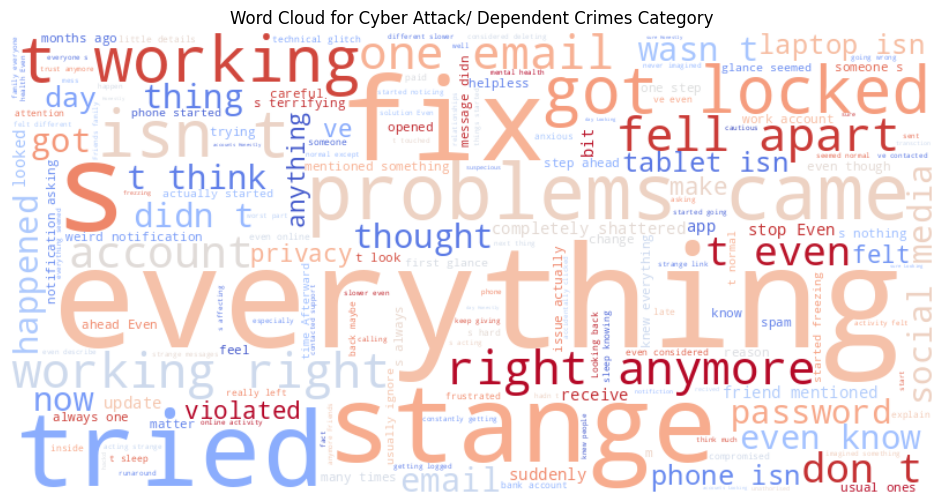

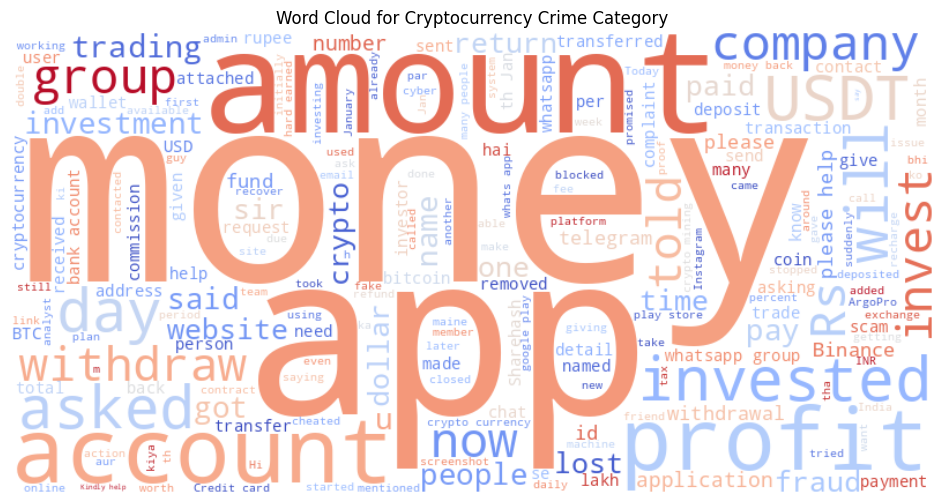

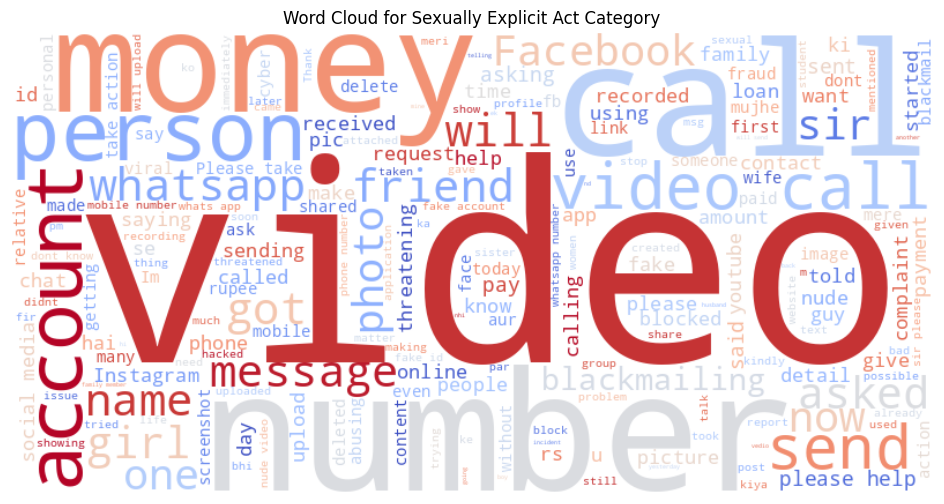

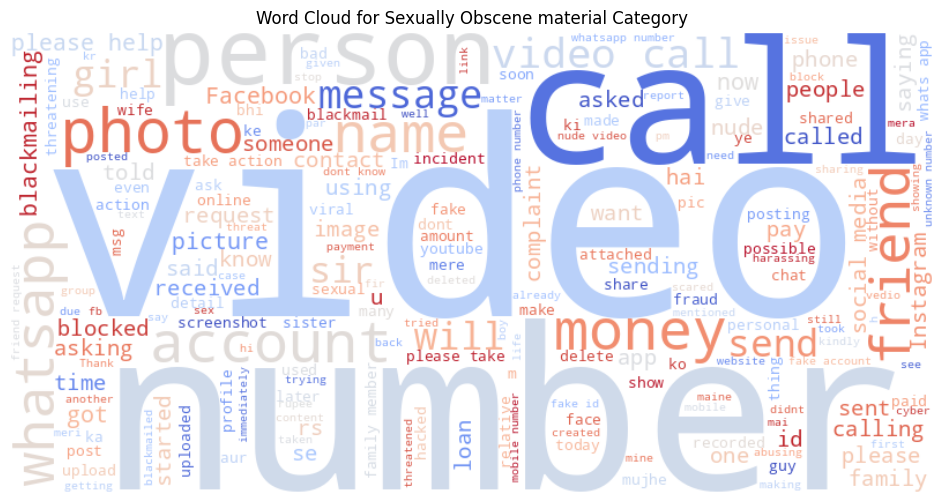

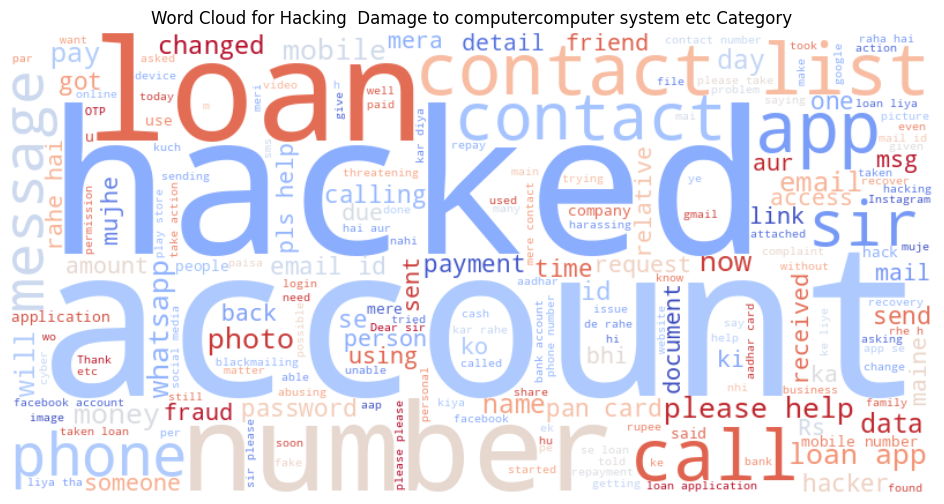

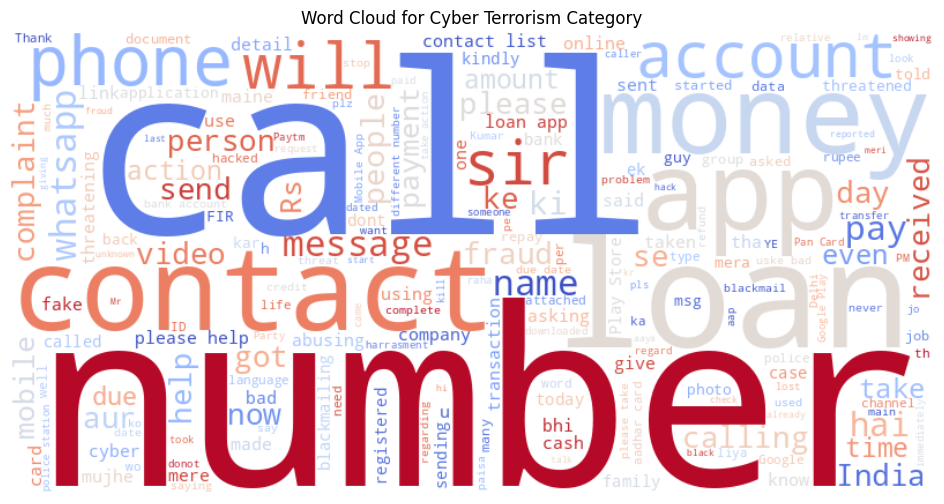

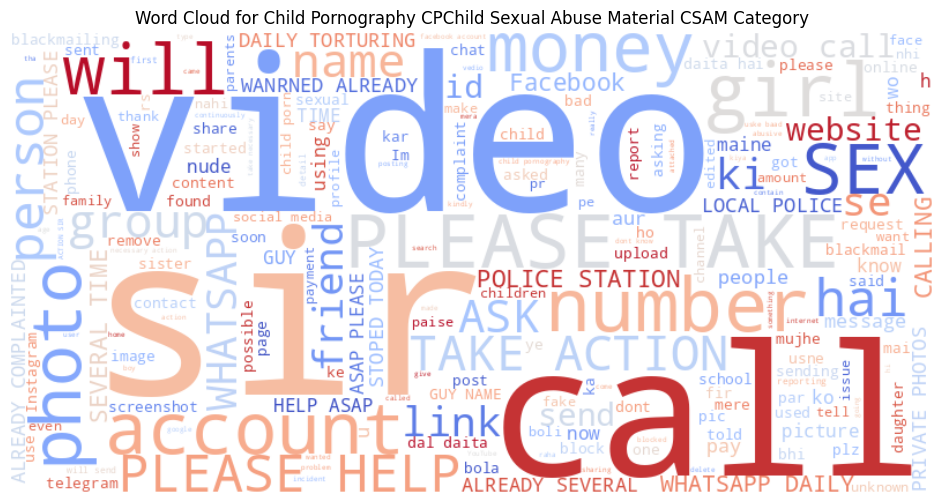

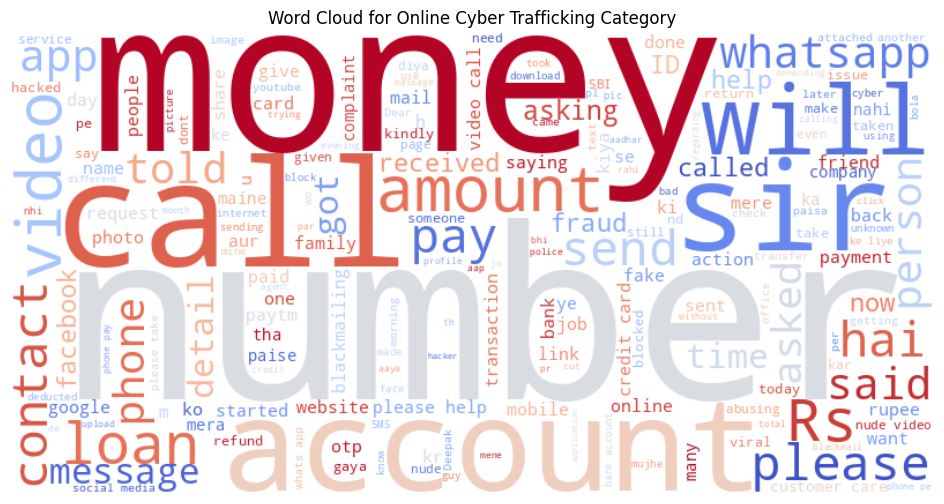

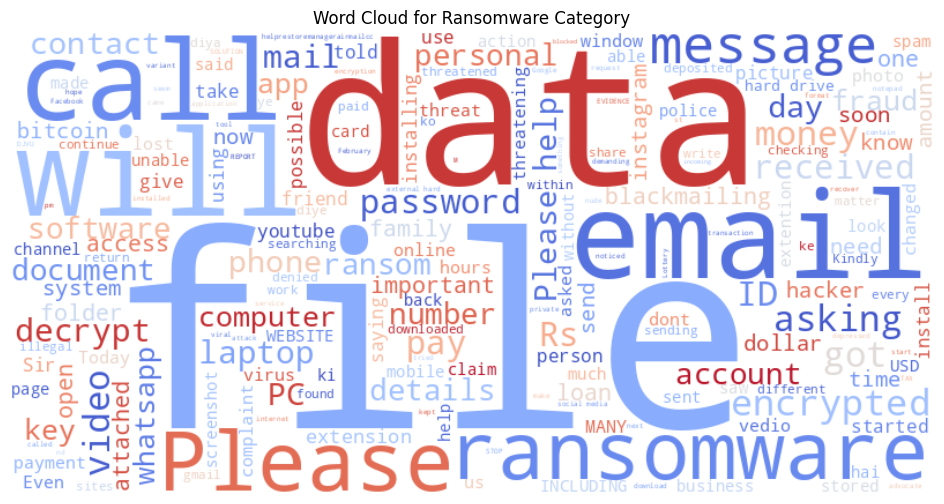

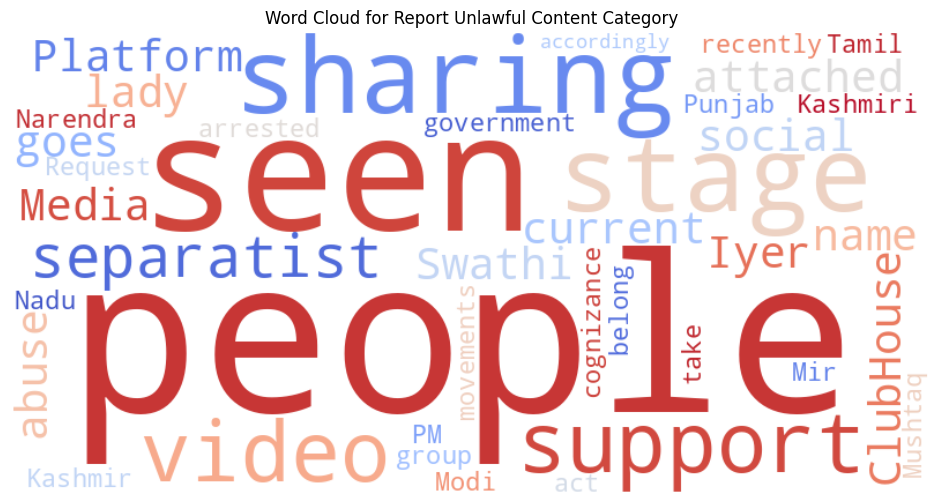

In [17]:
# Top N words in each category with color map for word clouds
top_n = 20
for category in train_data['category'].unique():
    words = ' '.join(train_data[train_data['category'] == category]['crimeaditionalinfo'].fillna(''))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', stopwords=stop_words).generate(words)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

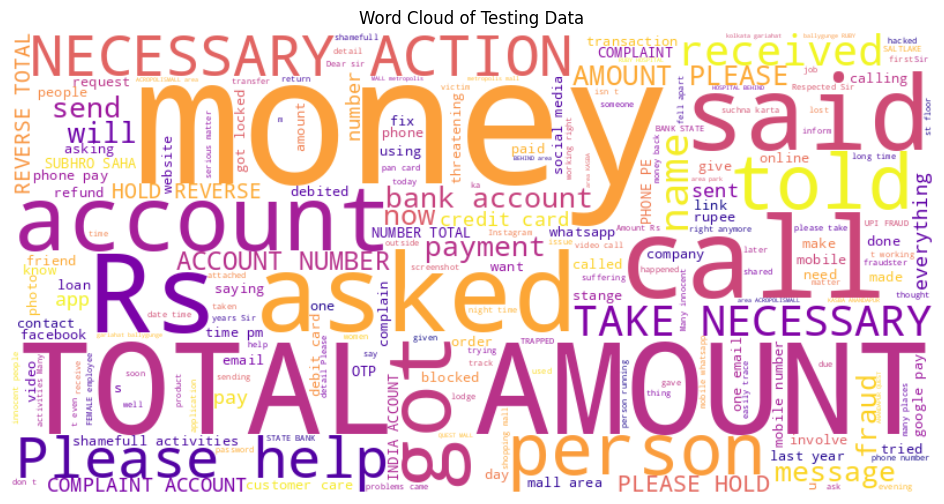

In [18]:
# Word Cloud for overall text, excluding stop words
stop_words = set(STOPWORDS)  # Default stop words from WordCloud
custom_stop_words = {'crime', 'information', 'provided'}  # Add more as needed
stop_words = stop_words.union(custom_stop_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma', stopwords=stop_words).generate(' '.join(test_data['crimeaditionalinfo'].fillna('')))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Testing Data')
plt.show()

In [19]:
# Display basic statistics of text lengths
print("Basic Statistics of Text Lengths:\n", train_data['text_length'].describe())

Basic Statistics of Text Lengths:
 count    93686.000000
mean        70.183720
std         58.362887
min          0.000000
25%         33.000000
50%         52.000000
75%         90.000000
max        370.000000
Name: text_length, dtype: float64


In [2]:
import re

# Fill null values in 'crimeaditionalinfo' column with a placeholder
train_data['crimeaditionalinfo'].fillna('No information provided', inplace=True)
test_data['crimeaditionalinfo'].fillna('No information provided', inplace=True)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the text data
train_data['cleaned_text'] = train_data['crimeaditionalinfo'].apply(clean_text)
test_data['cleaned_text'] = test_data['crimeaditionalinfo'].apply(clean_text)

# Split train_data into train and validation sets
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Display the first few rows to verify
print(train_data[['crimeaditionalinfo', 'cleaned_text']].head())
print(test_data[['crimeaditionalinfo', 'cleaned_text']].head())


<ipython-input-2-666e75e65047>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['crimeaditionalinfo'].fillna('No information provided', inplace=True)
<ipython-input-2-666e75e65047>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

                                      crimeaditionalinfo  \
60113  Sir \r\nMera khata gursahgang ke SBI bank me h...   
50316  My Mother received the call on  Jan   Tuesday ...   
81961  IN THIS HONEY TRAP I LOST MY MONEY  THEY CHEAT...   
23351  Identity theft   Vishing Call Fraud  CreditDeb...   
78479  On  between  pm the entire computer data is co...   

                                            cleaned_text  
60113  sir \r\nmera khata gursahgang ke sbi bank me h...  
50316  my mother received the call on  jan   tuesday ...  
81961  in this honey trap i lost my money  they cheat...  
23351  identity theft   vishing call fraud  creditdeb...  
78479  on  between  pm the entire computer data is co...  
                                  crimeaditionalinfo  \
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...   
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT   
2  The issue actually started when I got this ema...   
3  I am amit kumar from karwi chitrakoot I am tot...   
4  I 

In [3]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load tokenizer and model with pretrained weights
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(train_data['category'].unique()))

# Freeze initial layers to speed up training
for param in model.distilbert.transformer.layer[:2].parameters():  # Freeze the first two layers
    param.requires_grad = False

# Set device to CPU (or GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Tokenization function
def tokenize_data(texts, max_length=128):
    return tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Tokenize datasets
train_encodings = tokenize_data(train_data['cleaned_text'])
val_encodings = tokenize_data(val_data['cleaned_text'])
test_encodings = tokenize_data(test_data['cleaned_text'])

# Labels encoding
train_labels = torch.tensor(train_data['category'].factorize()[0])
val_labels = torch.tensor(val_data['category'].factorize()[0])
test_labels = torch.tensor(test_data['category'].factorize()[0])

# Prepare Datasets and DataLoaders
class CrimeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CrimeDataset(train_encodings, train_labels)
val_dataset = CrimeDataset(val_encodings, val_labels)
test_dataset = CrimeDataset(test_encodings, test_labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
epochs = 5
gradient_accumulation_steps = 10  # Adjust for larger effective batch size

model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    epoch_loss = 0
    for i, batch in enumerate(tqdm(train_loader)):
        # Move batch data to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss / gradient_accumulation_steps  # Scale loss for gradient accumulation

        # Backward pass
        loss.backward()

        # Update weights
        if (i + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    print(f"Average training loss for epoch {epoch+1}: {avg_epoch_loss}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


100%|██████████| 4685/4685 [11:16<00:00,  6.93it/s]


Average training loss for epoch 1: 0.08044215787665296
Epoch 2/5


100%|██████████| 4685/4685 [11:16<00:00,  6.92it/s]


Average training loss for epoch 2: 0.06455274052021423
Epoch 3/5


100%|██████████| 4685/4685 [11:16<00:00,  6.93it/s]


Average training loss for epoch 3: 0.05813418339337585
Epoch 4/5


100%|██████████| 4685/4685 [11:16<00:00,  6.93it/s]


Average training loss for epoch 4: 0.04998398119273865
Epoch 5/5


100%|██████████| 4685/4685 [11:16<00:00,  6.93it/s]

Average training loss for epoch 5: 0.04110690910918186


In [5]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Validation loop with full metrics
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in DataLoader(test_dataset, batch_size=64):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")


Test Accuracy: 0.62
Test Precision: 0.61
Test Recall: 0.62
Test F1 Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
